K-means

In [1]:
import numpy as np
import os
from collections import Counter
import pandas as pd
from scipy.spatial.distance import cdist

In [4]:
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
os.chdir(parent_dir) 

from preprocessing import DataLoader, DataProcessor

# Initialize the DataLoader
data_loader     = DataLoader()
data_processor  = DataProcessor()

df_satimage, labels_satimage= data_loader.load_arff_data("satimage")
df_splice, labels_splice    = data_loader.load_arff_data("splice")
df_vowel, labels_vowel      = data_loader.load_arff_data("vowel")


df_satimage = data_processor.preprocess_dataset(df_satimage)
df_splice   = data_processor.preprocess_dataset(df_splice)
df_vowel    = data_processor.preprocess_dataset(df_vowel)

In [8]:
from kmeans import kmeans

ImportError: cannot import name 'kmeans' from 'kmeans' (/Users/julia/Desktop/MAI/IML/lab/IML/Work3/kmeans/kmeans.py)

In [ ]:
class fast_global_k_means(kmeans.KMeans):
    def __init__(self, k=2, max_iters=100, distance='euclidean', seed=0, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.distance = distance
        self.seed = seed
        self.verbose = verbose
    
    # X (n, d), centroids (k, d)
    def _compute_bounds(self, X, centroids):
        distances = np.array([np.linalg.norm(X - c, axis=1) for c in centroids])
        min_distances = np.min(distances, axis=0) # distances from x to their nearest cluster
        bounds= [np.sum(np.maximum(min_distances - np.linalg.norm(X - xn, axis=1)**2, 0)) for xn in X]  # reduction in error obtained for each sample (as a new cluster)
        return np.array(bounds)


    def fit_predict(self, X):
        np.random.seed(self.seed)
        X = np.array(X)
        n = X.shape[0]

        first_centroid = np.mean(X, axis=0).reshape(1, -1)  # converts 2D (1, d)
        self.centroids = first_centroid
        
        for k_value in range(2, self.k+1):
            if self.verbose:
                print("Adding cluster", k_value)

            bounds = self._compute_bounds(X, self.centroids)
            new_centroid_idx = np.argmax(bounds)
            new_centroid = X[new_centroid_idx].reshape(1, -1)
            
            init_centroids = np.vstack([self.centroids, new_centroid])

            km = kmeans.KMeans(k=k_value, distance=self.distance, seed=self.seed)
            _ = km.fit_predict(X, initial_centroids=init_centroids)

            self.centroids = km.get_centroids()
            

        final_kmeans = kmeans.KMeans(
            k=self.k, distance=self.distance, seed=self.seed)
        labels = final_kmeans.fit_predict(
            X, initial_centroids=self.centroids)

        self.iterations = final_kmeans.get_iterations()

        return labels
    

    def get_iterations(self):
        return self.iterations

NameError: name 'kmeans' is not defined

In [37]:
fgkm = fast_global_k_means(k=7)
labels = fgkm.fit_predict(df_satimage)

In [40]:
labels

array([5, 5, 5, ..., 4, 4, 4])

In [16]:
fgkm = global_kmeans.fast_global_k_means(k=3)

NameError: name 'global_kmeans' is not defined

In [5]:
fgkm.fit_predict(df_satimage)

IndexError: index 36 is out of bounds for axis 1 with size 36

In [4]:
import pandas as pd

In [7]:
results = pd.read_csv("results/kmeans_results.csv")

In [ ]:
filtered_df = results[(results['Dataset'] == 'satimage')]

In [10]:
best_values = []

if not filtered_df.empty:  # Ensure the filtered DataFrame is not empty
    best_ari = filtered_df.loc[filtered_df['ARI'].idxmax()]
    best_silhouette = filtered_df.loc[filtered_df['ARI'].idxmax()]
    best_DBI = filtered_df.loc[filtered_df['ARI'].idxmax()]
    best_values.append(best_ari)
    best_values.append(best_silhouette)
    best_values.append(best_DBI)
    
else:
    print("No rows match the filtering criteria.")

In [11]:
pd.DataFrame(best_values)

,Dataset,k,Distance,Seed,ARI,Silhouette,DBI,Accuracy,Iterations
151,satimage,7,cosine,12,0.614318,0.28635,1.184951,0.826729,19
151,satimage,7,cosine,12,0.614318,0.28635,1.184951,0.826729,19
151,satimage,7,cosine,12,0.614318,0.28635,1.184951,0.826729,19


In [5]:
# labels_satimage.unique()
# labels_splice.unique()
labels_vowel.unique()

array(['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd',
       'hud', 'hed'], dtype=object)

In [6]:
from sklearn.cluster import KMeans as SKLearnKMeans

In [7]:
sklearn_kmeans = SKLearnKMeans(n_clusters=11, n_init=10, max_iter=300, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(df_vowel)
# sklearn_accuracy = accuracy_score(labels_vowel, sklearn_labels)
sklearn_accuracy = KMeans.compute_accuracy(sklearn_labels, labels_vowel)
sklearn_accuracy

ValueError: Mix of label input types (string and number)

In [ ]:
sklearn

In [36]:
def compute_pairwise_distances(data):
    # Step 1: Compute the squared norms of each data point (||x_i||^2)
    squared_norms = np.sum(data ** 2, axis=1)  # Shape: (n_samples,)

    # Step 2: Compute the pairwise squared distances
    pairwise_distances = (
        squared_norms[:, np.newaxis]  # Shape: (n_samples, 1)
        + squared_norms[np.newaxis, :]  # Shape: (1, n_samples)
        - 2 * np.dot(data, data.T)  # Dot product gives (x_i . x_j)
    )
    
    # Ensure no negative distances due to floating-point precision
    np.fill_diagonal(pairwise_distances, 0)  # Diagonal should be exactly zero
    pairwise_distances = np.maximum(pairwise_distances, 0)  # Ensure non-negativity

    return pairwise_distances

In [23]:
data = np.array(df_satimage.copy())
data = data[0:2]
pd.DataFrame(np.linalg.norm(data[:, np.newaxis] - data[np.newaxis, :], axis=2) ** 2)

,0,1
0,0.00000,3.14447
1,3.14447,0.00000


In [13]:
class Distances:
    @staticmethod
    def _minkowski_distance(X, centroid, r=1):
        return np.sum(np.abs(X-centroid)**r, axis=1)**(1/r)
    
    @staticmethod
    def manhattan(X, centroid):
        return Distances._minkowski_distance(X, centroid, r=1)

    @staticmethod
    def euclidean(X, centroid):
        return Distances._minkowski_distance(X, centroid, r=2)
    
    @staticmethod
    def cosine_distance(X, centroid):
        similarity = np.dot(X, centroid) / (np.linalg.norm(X, axis=1) * np.linalg.norm(centroid))
        return 1-similarity

In [14]:
class KMeans:

    def __init__(self, k=2, max_iters=100, distance='euclidean', seed=0, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.distance = KMeans._get_distance(distance)
        self.seed = seed
        self.verbose = verbose

        self.centroids = None
        

    @staticmethod
    def _get_distance(distance):
        if distance == 'manhattan':
            return Distances.manhattan
        elif distance == 'euclidean':
            return Distances.euclidean
        elif distance == 'cosine':
            return Distances.cosine_distance
        else:
            raise ValueError("Unsupported distance metric. Choose 'euclidean', 'manhattan', or 'cosine'.")
        
    
    def _assign_samples(self, X):
        distances = np.array([self.distance(X, centroid) for centroid in self.centroids])
        return np.argmin(distances, axis=0)
    
    # change tolerance
    def _check_convergence(self, new_centroids):
        return np.allclose(self.centroids, new_centroids, atol=1e-6)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            cluster_samples = X[labels == i]
            if len(cluster_samples) > 0:
                new_centroids[i] = cluster_samples.mean(axis=0)
            else:
                # In case a cluster does not have any sample, reassign
                new_centroids[i] = X[np.random.randint(0, X.shape[0])]
        return new_centroids

    
    def fit_predict(self, X):
        np.random.seed(self.seed)

        X = np.array(X)

        # Centroid initialization
        centroids_idx = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[centroids_idx]

        for i in range(self.max_iters):
            if self.verbose:
                print(f"Iteration: {i}/{self.max_iters}")
            
            labels = self._assign_samples(X)

            # Update centroids based on current assignments
            new_centroids = self._update_centroids(X, labels)
            if self._check_convergence(new_centroids):
                if (self.verbose):
                    print(f"Converged at iteration {i+1}")
                break

            self.centroids = new_centroids
            if (i == self.max_iters-1):
                print(f"No convergence")

        return labels
    
    def predict(self, X):
        if self.centroids is None:
            raise Exception("Model has not been fitted yet.")
        
        X = np.array(X)
        return self._assign_samples(X)
    
    def get_centroids(self):
        if self.centroids is None:
            raise Exception("Model has not been fitted yet.")
    
        return self.centroids
    
    @staticmethod
    def compute_accuracy(predicted_labels, true_labels):
        predicted_labels = np.array(predicted_labels)
        true_labels = np.array(true_labels)

        label_mapping = {}
        clusters = np.unique(predicted_labels)

        for c in clusters:
            samples_idxs = np.where(predicted_labels == c)

            true_labels_cluster = true_labels[samples_idxs]
            if len(true_labels_cluster) > 0:
                label_mapping[c] = Counter(true_labels_cluster).most_common(1)[0][0]
            else:
                label_mapping[c] = -1
        
        matched_predicted_labels = np.array([label_mapping[c] for c in predicted_labels])

        accuracy = np.mean(matched_predicted_labels == true_labels)
        return accuracy  
        

In [ ]:
class fast_global_k_means:
    def __init__(self, k=2, max_iters=100, distance='euclidean', seed=0, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.distance = distance
        self.seed = seed

        self.centroids = np.array()

    def fit_predict(self, X):
        n = X.shape[0]

        first_centroid = np.mean(X, axis=0)
        self.centroids.append(first_centroid)

        distances = np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :], axis=2) ** 2

        for k_value in range(1, self.k):
            centroid_distances = np.linalg.norm(data[:, np.newaxis] - self.centroids[np.newaxis, :], axis=2) ** 2

            # Minimum distance between each sample and centroids
            min_distances = np.min(centroid_distances, axis=1)

            b_n = np.zeros(n)
            for i in range(n):
                b_n[i] = np.sum(np.maximum(min_distances - distances[i], 0))
            
            new_centroid_idx = np.argmax(b_n)
            new_centroid = X[new_centroid_idx]

            kmeans = KMeans(k=k_value, distance=self.distance, seed=self.seed)
            _ = kmeans.fit_predict(X)

            self.centroids = kmeans.get_centroids()
        
        final_kmeans = KMeans(k=self.k, distance=self.distance, seed=self.seed)
        labels = final_kmeans.fit_predict(X, initial_centroids=self.centroids)
        
        return labels

In [42]:
# l = labels_satimage
l = labels_splice
l.unique()

array(['EI', 'IE', 'N'], dtype=object)

In [43]:
kmeans = KMeans(k=3, verbose=True)
# labels = kmeans.fit_predict(df_satimage)
labels = kmeans.fit_predict(df_splice)

Iteration: 0/100
Iteration: 1/100
Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Iteration: 5/100
Iteration: 6/100
Iteration: 7/100
Iteration: 8/100
Iteration: 9/100
Iteration: 10/100
Iteration: 11/100
Iteration: 12/100
Iteration: 13/100
Iteration: 14/100
Iteration: 15/100
Iteration: 16/100
Iteration: 17/100
Iteration: 18/100
Iteration: 19/100
Iteration: 20/100
Iteration: 21/100
Iteration: 22/100
Iteration: 23/100
Iteration: 24/100
Iteration: 25/100
Iteration: 26/100
Iteration: 27/100
Iteration: 28/100
Iteration: 29/100
Iteration: 30/100
Iteration: 31/100
Iteration: 32/100
Iteration: 33/100
Iteration: 34/100
Iteration: 35/100
Iteration: 36/100
Iteration: 37/100
Iteration: 38/100
Converged at iteration 39


In [44]:
KMeans.compute_accuracy(labels_splice, labels)

np.float64(0.7508316699933466)

In [ ]:
labels

In [10]:
import matplotlib.pyplot as plt

Iteration: 0/100
Iteration: 1/100
Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Converged at iteration 5


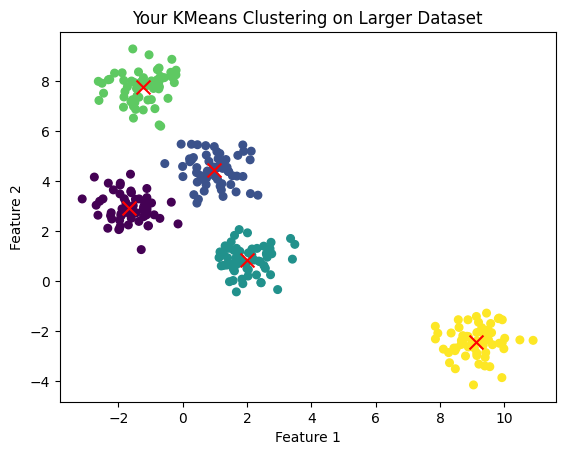

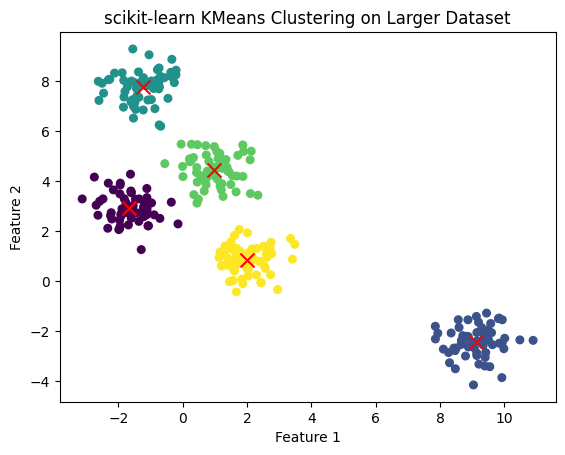

In [11]:
from sklearn.cluster import KMeans as SKKMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 5 clusters
X_large, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Initialize and fit your KMeans
kmeans_large = KMeans(k=5, max_iters=100, distance='euclidean', seed=0, verbose=True)
labels_large = kmeans_large.fit_predict(X_large)
centroids_large = kmeans_large.get_centroids()

# Compare with scikit-learn
sk_kmeans_large = SKKMeans(n_clusters=5, max_iter=100, random_state=42)
sk_labels_large = sk_kmeans_large.fit_predict(X_large)
sk_centroids_large = sk_kmeans_large.cluster_centers_

# Visualize your KMeans clustering
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_large, cmap='viridis', marker='o', s=30)
plt.scatter(centroids_large[:, 0], centroids_large[:, 1], c='red', marker='x', s=100)
plt.title('Your KMeans Clustering on Larger Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize scikit-learn's KMeans clustering
plt.scatter(X_large[:, 0], X_large[:, 1], c=sk_labels_large, cmap='viridis', marker='o', s=30)
plt.scatter(sk_centroids_large[:, 0], sk_centroids_large[:, 1], c='red', marker='x', s=100)
plt.title('scikit-learn KMeans Clustering on Larger Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
